In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams.update({'font.size': 12})
import csv
from datetime import datetime

posnegcounter = 0
posdates = []
posnums = []
posareas = []
posfluxes = []
negdates = []
negnums = []
negareas = []
negfluxes = []

# Open file and return arrays for dates (as datetime), latitudes (as float) and longitudes (as float)
with open('/Users/fraser/Github/MagneticFragmentationOutput/fragment_properties/AR12010/bulk_props.txt', 'r') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',')
    for row in filereader:
        if posnegcounter % 2 == 0:
            posdates.append(datetime.strptime(row[0][0:19], '%Y-%m-%d %H:%M:%S'))
            posnums.append(float(row[1]))
            posareas.append(float(row[2]))
            posfluxes.append(float(row[3]))
        else:
            negdates.append(datetime.strptime(row[0][0:19], '%Y-%m-%d %H:%M:%S'))
            negnums.append(float(row[1]))
            negareas.append(float(row[2]))
            negfluxes.append(float(row[3]))
        posnegcounter += 1


In [14]:
posdates

[datetime.datetime(2014, 3, 22, 23, 58, 15),
 datetime.datetime(2014, 3, 23, 0, 22, 15),
 datetime.datetime(2014, 3, 23, 0, 46, 15),
 datetime.datetime(2014, 3, 23, 1, 10, 15),
 datetime.datetime(2014, 3, 23, 1, 34, 15),
 datetime.datetime(2014, 3, 23, 1, 58, 15),
 datetime.datetime(2014, 3, 23, 2, 22, 15),
 datetime.datetime(2014, 3, 23, 2, 46, 15),
 datetime.datetime(2014, 3, 23, 3, 10, 15),
 datetime.datetime(2014, 3, 23, 3, 34, 15),
 datetime.datetime(2014, 3, 23, 3, 58, 15),
 datetime.datetime(2014, 3, 23, 4, 22, 15),
 datetime.datetime(2014, 3, 23, 4, 46, 15),
 datetime.datetime(2014, 3, 23, 5, 10, 15),
 datetime.datetime(2014, 3, 23, 5, 34, 16),
 datetime.datetime(2014, 3, 23, 5, 58, 16),
 datetime.datetime(2014, 3, 23, 6, 22, 16),
 datetime.datetime(2014, 3, 23, 6, 46, 16),
 datetime.datetime(2014, 3, 23, 7, 10, 16),
 datetime.datetime(2014, 3, 23, 7, 34, 16),
 datetime.datetime(2014, 3, 23, 7, 58, 16),
 datetime.datetime(2014, 3, 23, 8, 22, 16),
 datetime.datetime(2014, 3, 23,

Text(0,0.5,'Number of fragments')

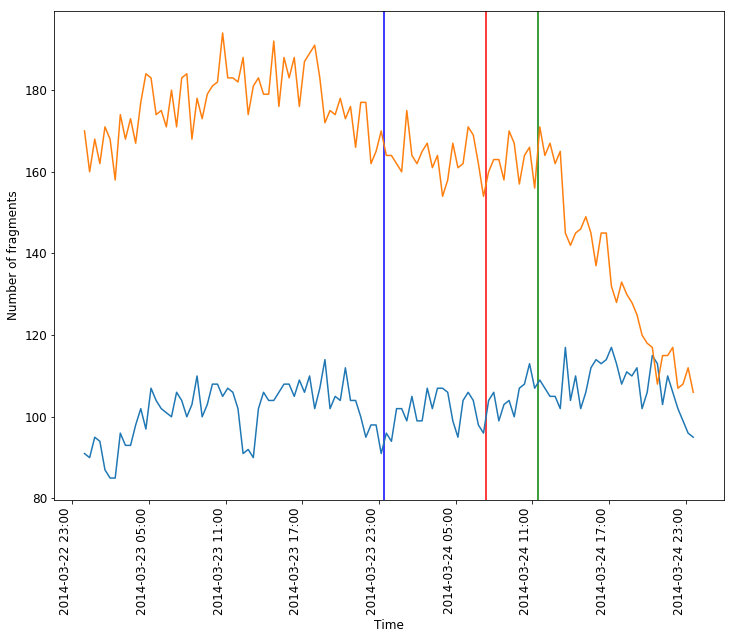

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(posdates, posnums)
ax.plot(negdates, negnums)

ax.axvline(mdates.strpdate2num('%Y-%m-%d %H:%M:%S')('2014-03-24 07:24:16'), color='r', zorder=0)
ax.axvline(mdates.strpdate2num('%Y-%m-%d %H:%M:%S')('2014-03-24 11:24:16'), color='g', zorder=0)
ax.axvline(mdates.strpdate2num('%Y-%m-%d %H:%M:%S')('2014-03-23 23:24:16'), color='b', zorder=0)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# rotate and align the tick labels so they look better
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Number of fragments')

Text(0,0.5,'Total fragment area (square cm)')

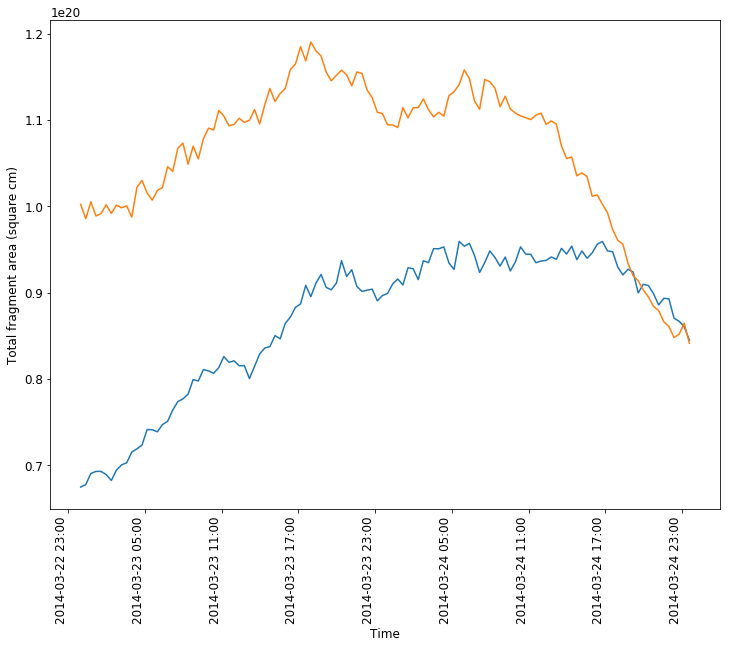

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(posdates, posareas)
ax.plot(negdates, negareas)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# rotate and align the tick labels so they look better
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Total fragment area (square cm)')

Text(0,0.5,'Total flux (Maxwells)')

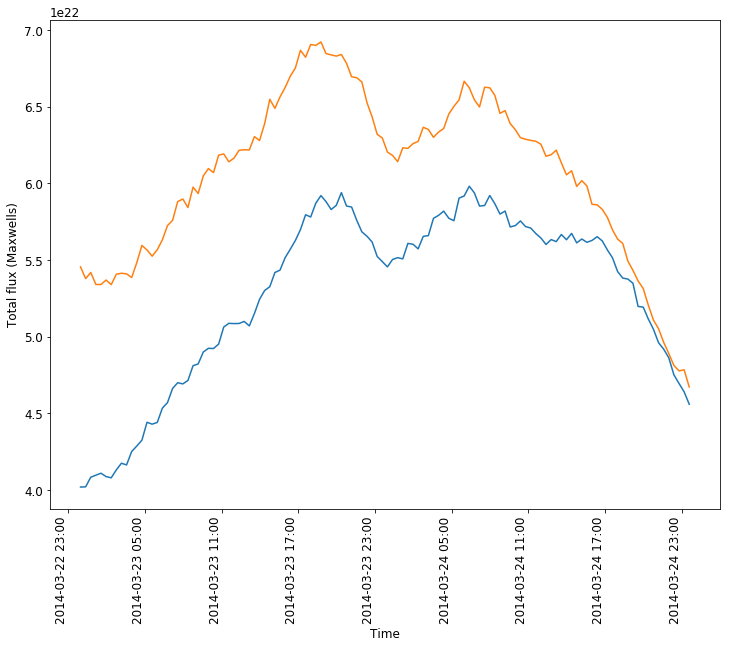

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(posdates, posfluxes)
ax.plot(negdates, [abs(number) for number in negfluxes])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

# rotate and align the tick labels so they look better
fig.autofmt_xdate(rotation=90)

ax.set_xlabel('Time')
ax.set_ylabel('Total flux (Maxwells)')